# Regression

### Importing Libraries

In [1]:
from sklearn import preprocessing
import numpy as np

In [2]:
# loading data
data=np.array([[3,-1.5,2,-5.4],[0,4,-0.3,2.1],[1,3.3,-1.9,-4.3]])

### Removing mean from the data

In [3]:
dataStandardize = preprocessing.scale(data)
print("Mean : ", data.mean(axis=0))
print("Standard Deviation : ", data.std(axis=0))
print("Mean : ", dataStandardize.mean(axis=0))
print("Standard Deviation : ", dataStandardize.std(axis=0))

Mean :  [ 1.33333333  1.93333333 -0.06666667 -2.53333333]
Standard Deviation :  [1.24721913 2.44449495 1.60069429 3.30689515]
Mean :  [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Standard Deviation :  [1. 1. 1. 1.]


### Scaling Data

In [4]:
print(data)
scaledData = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(data)
print(scaledData)

[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
[[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


### Normalizing Data

In [5]:
normalizedData = preprocessing.normalize(data, norm='l1')
print(data)
print(normalizedData)

[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


### Binarization of Data

In [6]:
print(data)

binarizedData = preprocessing.Binarizer().transform(data)
print(binarizedData)

[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]]


### OneHotCoder

In [18]:
data1 = [[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4,3]]

encoder = preprocessing.OneHotEncoder()
encoder.fit(data1)
encoder_vector = encoder.transform(data1).toarray()
print(encoder_vector)
# print(encoder)

[[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]]


In [8]:
X = []
Y = []

with open("data_singlevar.txt", "r") as f:
    for line in f.readlines():
        x,y = [float(x) for x in line.split(",")]
        X.append(x)
        Y.append(y)
print(X)
print(Y)
print(len(X))
        

[4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36]
[4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99]
50


### Partition for traning and testing data

In [9]:
ntrain = int(0.8 * len(X))
ntest = len(X) - ntrain

xtrain = np.array(X[:ntrain]).reshape(ntrain, 1)
ytrain = np.array(Y[:ntrain])

xtest = np.array(X[ntrain:]).reshape((ntest,1))
ytest = np.array(Y[ntrain:])

### Building Model

In [10]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(xtrain, ytrain)

print(lr.coef_)
print(lr.intercept_)

[0.39217986]
2.9135444769492036


### using model to predict data set

In [11]:
ytestPredicted = lr.predict(xtest)
print(ytest)
print(ytestPredicted)

[2.85 4.86 1.31 3.99 2.92 4.72 3.83 2.58 2.89 1.99]
[2.20369892 4.45873314 2.12918475 3.1253216  3.21944477 3.75673118
 3.91360313 2.66647116 3.32925513 2.77235973]


### Evaluate model accuracy

In [12]:
import sklearn.metrics as sm

print("Mean Absolute Error : ",round(sm.mean_absolute_error(ytest, ytestPredicted),2))
print("Mean Squared Error : ",round(sm.mean_squared_error(ytest, ytestPredicted),2))
print("Median Absolute Error : ",round(sm.median_absolute_error(ytest, ytestPredicted),2))
print("Explained Variance Score : ",round(sm.explained_variance_score(ytest, ytestPredicted),2))
print("R2 Score : ",round(sm.r2_score(ytest, ytestPredicted),2))

Mean Absolute Error :  0.54
Mean Squared Error :  0.38
Median Absolute Error :  0.54
Explained Variance Score :  0.68
R2 Score :  0.68


### ploting the model

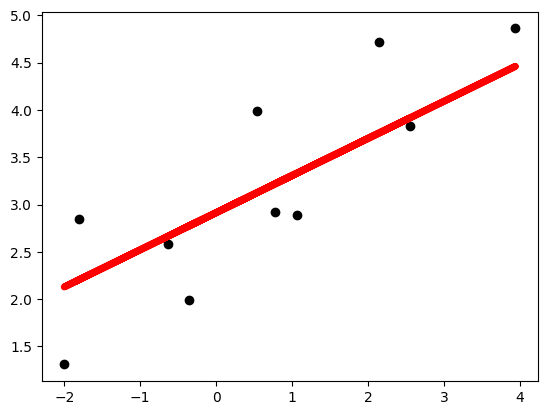

In [13]:
import matplotlib.pyplot as plt

plt.scatter(xtest, ytest, color='black')
plt.plot(xtest, ytestPredicted, color='red', linewidth=5)
plt.show()

### saving the model for future references

In [14]:
import pickle

pickle.dump(lr, open("newLRModel.pkl", 'wb'))

In [15]:
x=[[27.5]]
y = lr.predict(x)
print (y)

[13.69849072]
